In [17]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

sns.set_style("whitegrid")

def extract_scores(data):
    ranking = []
    for k, v in data["results"].items():
        for k2, v2 in v.items():
            if k2 != "alias":
                v2 = v2 if v2 != "N/A" else np.nan
                ranking.append(
                    pd.DataFrame(index=[(k, k2)], data=[v2])
                )

    ranking = pd.concat(ranking).rename(columns={0:"score"}).astype(float)
    ranking.index = pd.MultiIndex.from_tuples(ranking.index)
    return ranking

In [6]:
LLAMA = "results_llama3_dyk/results.json"
LLAMA_ALT = "results_llama3_dyk_altered/results.json"
OPENBIO = "results_openbio_dyk/results.json"
OPENBIO_ALT = "results_openbio_dyk_altered/results.json"
BIELIK = "results_bielik_dyk/results.json"
BIELIK_ALT = "results_bielik_dyk_altered/results.json"

data = []
names = ["llama", "llama_alt", "openbio", "openbio_alt", "bielik", "bielik_alt"]

for name, file in zip(names, [LLAMA, LLAMA_ALT, OPENBIO, OPENBIO_ALT, BIELIK, BIELIK_ALT]):
    with open(file) as f:
        fdata = json.load(f)
        data.append(extract_scores(fdata).droplevel(0, axis=0).rename(columns={"score":name}))

data = pd.concat(data, axis=1)
data

,llama,llama_alt,openbio,openbio_alt,bielik,bielik_alt
"acc,none",0.225462,0.281827,0.185617,0.517007,0.688047,0.191448
"acc_stderr,none",0.013034,0.014032,0.012126,0.015586,0.014450,0.012271
"f1,none",0.303930,0.315107,0.292230,0.229457,0.404453,0.290102
"f1_stderr,none",NaN,NaN,NaN,NaN,NaN,NaN
"acc_norm,none",0.225462,0.281827,0.185617,0.517007,0.688047,0.191448
"acc_norm_stderr,none",0.013034,0.014032,0.012126,0.015586,0.014450,0.012271


<Axes: title={'center': 'F1 score'}>

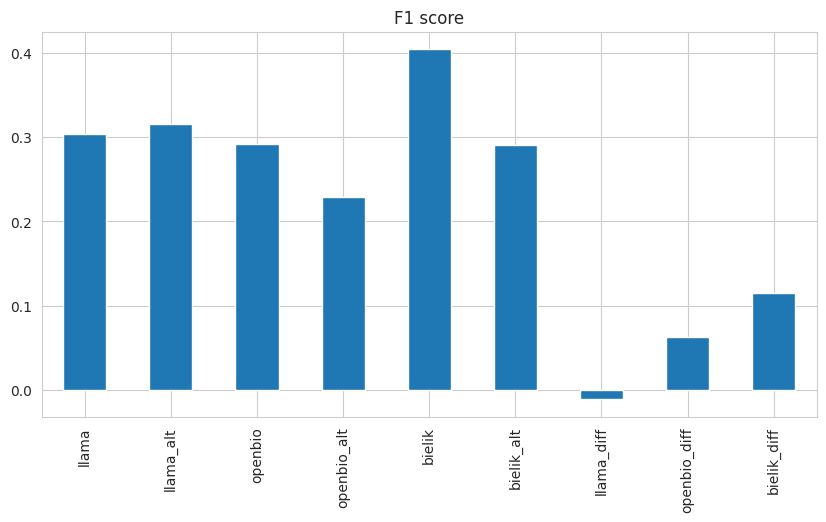

In [18]:
data.loc["f1,none"].plot(kind="bar", figsize=(10, 5), title="F1 score")


In [9]:
data["llama_diff"] = data["llama"] - data["llama_alt"]
data["openbio_diff"] = data["openbio"] - data["openbio_alt"]
data["bielik_diff"] = data["bielik"] - data["bielik_alt"]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'llama'),
  Text(1, 0, 'llama_alt'),
  Text(2, 0, 'openbio'),
  Text(3, 0, 'openbio_alt'),
  Text(4, 0, 'bielik'),
  Text(5, 0, 'bielik_alt'),
  Text(6, 0, 'llama_diff'),
  Text(7, 0, 'openbio_diff'),
  Text(8, 0, 'bielik_diff')])

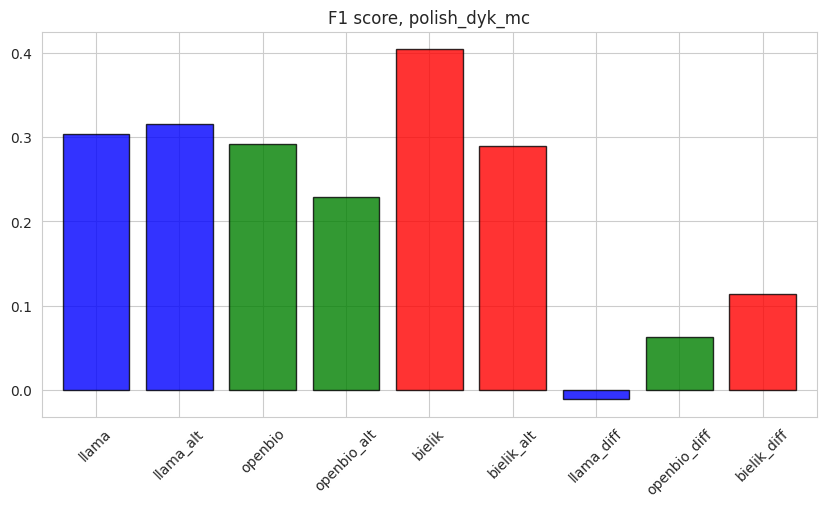

In [22]:
data.loc["f1,none"].plot(
    kind="bar", figsize=(10, 5), title="F1 score, polish_dyk_mc", 
    color=["blue", "blue", "green", "green", "red", "red", "blue", "green", "red"], alpha=0.8, width=0.8, edgecolor="black"
    )
plt.xticks(rotation=45)